In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PlateData import *

In [3]:
directory =  "/Users/sam/Dropbox (Harvard University)/Data/Mn_reporter_assay/"
filename = "SB_040622.xlsx"

RFU = read_Mn_assay_excel(filename, header_length=36, nrows = (135-38, 10, 156-38), directory=directory)
OD600 = read_Mn_assay_excel(filename, header_length=161, nrows = (135-38, 10, 156-38), directory=directory)

row_annotations = {'[MnCl2]': [np.nan, 1000, 100, 10, 1, 0, 1000, np.nan],
                   'use_row': [False, True, True, True, True, True, True, False]}

col_annotations = {'reporter': ['NaN', 'pSB1-EV', 'pSB1em2', 'pSB1em2', 'pSB1em2', 'pSB1em2', 
                                       'pSB1-EV', 'pSB1em2', 'pSB1em2', 'pSB1em2', 'pSB1em2', 'NaN'],
                   'construct': ['NaN', 'EV', 'Drad 1', 'Drad 2', 'Drad 3', 'DraNramp D56A',
                                        'EV', 'Drad 1', 'Drad 2', 'Drad 3', 'DraNramp D56A', 'NaN'],
                   'sample': [0,1,2,3,4,5,1,2,3,4,5,0],
                   'use_col': [False, True, True, True, True, True, True, True, True, True, True, False],
                   'rep': [-1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, -1]}

Exp_0406 = PlateAssay((RFU, OD600), df_keys=("RFU", "OD"), 
                 row_annotations=row_annotations, col_annotations=col_annotations)

Text(0, 0.5, '[$MnCl_2$] (µM)')

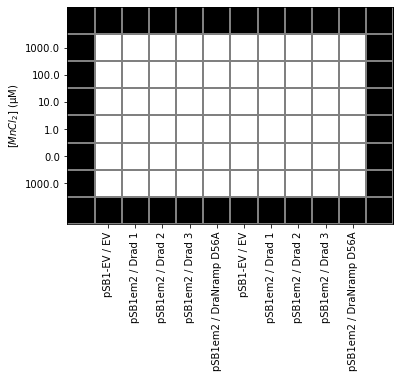

In [4]:
Exp_0406.draw(row_annotations="[MnCl2]", col_annotations=("reporter", "construct"))
plt.ylabel("[$MnCl_2$] (µM)")

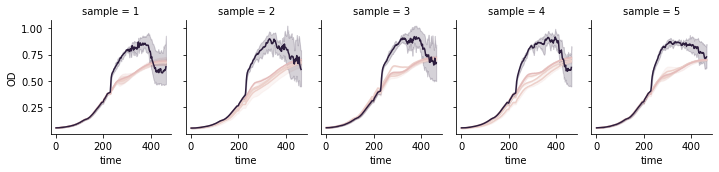

In [6]:
Exp_0406.grid("OD", hue="[MnCl2]", col="sample", aspect=0.8)

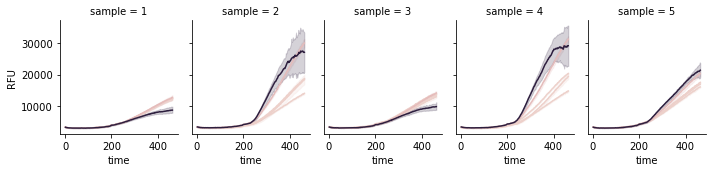

In [5]:
Exp_0406.grid("RFU", hue="[MnCl2]", col="sample", aspect=0.8)

<AxesSubplot:xlabel='time', ylabel='RFU'>

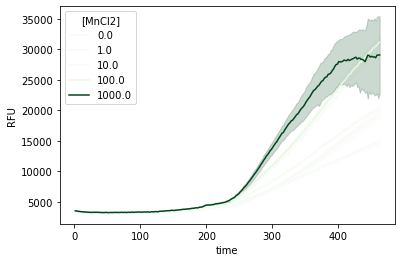

In [23]:
sns.lineplot(data=Exp_0406.select({"sample":4, "use_col":True, "use_row":True}),
             x="time",
             y="RFU",
             hue="[MnCl2]",
             palette="Greens")

<AxesSubplot:xlabel='time', ylabel='RFU'>

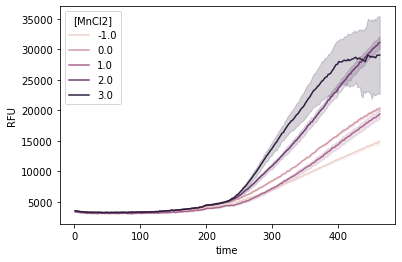

In [40]:
data = Exp_0406.select({"sample":4, "use_col":True, "use_row":True})
log_mn = np.log10(data["[MnCl2]"].replace(0, 0.1))

sns.lineplot(data=data, x="time", y="RFU", hue=log_mn)

<AxesSubplot:xlabel='time', ylabel='RFU'>

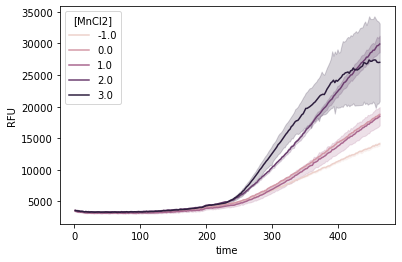

In [41]:
data = Exp_0406.select({"sample":2, "use_col":True, "use_row":True})
log_mn = np.log10(data["[MnCl2]"].replace(0, 0.1))

sns.lineplot(data=data, x="time", y="RFU", hue=log_mn)